### EDA

In [1]:
import chardet
import pandas as pd
from sqlalchemy import create_engine, text
import matplotlib.pyplot as plt
#import psycopg2

In [2]:
#chardet.detect(open("./Summer-Olympic-medals-1976-to-2008.csv", 'rb').read())['encoding']
chardet.detect(open("./Summer-Olympic-medals-1976-to-2008.csv", 'rb').read())

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [3]:
df = pd.read_csv("./Summer-Olympic-medals-1976-to-2008.csv", encoding="ISO-8859-1")
df.shape

(15433, 11)

In [4]:
#pd.read_csv("./Summer-Olympic-medals-1976-to-2008.csv", encoding="UTF-8")

In [5]:
df

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold


In [6]:
df.dropna(how = "all", inplace=True)
df

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold


In [7]:
df.count()

City            15316
Year            15316
Sport           15316
Discipline      15316
Event           15316
Athlete         15316
Gender          15316
Country_Code    15316
Country         15316
Event_gender    15316
Medal           15316
dtype: int64

In [8]:
df.dtypes

City             object
Year            float64
Sport            object
Discipline       object
Event            object
Athlete          object
Gender           object
Country_Code     object
Country          object
Event_gender     object
Medal            object
dtype: object

In [9]:
#df.astype({"Year": 'int64'}).dtypes
df["Year"] = df["Year"].astype("int64")
df.dtypes

City            object
Year             int64
Sport           object
Discipline      object
Event           object
Athlete         object
Gender          object
Country_Code    object
Country         object
Event_gender    object
Medal           object
dtype: object

In [10]:
df.nunique()

City                9
Year                9
Sport              28
Discipline         41
Event             293
Athlete         11337
Gender              2
Country_Code      128
Country           127
Event_gender        3
Medal               3
dtype: int64

In [11]:
#df["Country_Code"].unique()

In [12]:
#df["Country"].unique()

In [13]:
#df.groupby(["Country_Code", "Medal"]).count()

In [14]:
#df.groupby(by="Country_Code")["Medal"].count()

In [15]:
df.groupby(by="Country_Code")["Medal"].value_counts()

Country_Code  Medal 
AFG           Bronze     1
AHO           Silver     1
ALG           Bronze     8
              Gold       4
              Silver     2
                        ..
ZAM           Silver     1
              Bronze     1
ZIM           Gold      18
              Silver     4
              Bronze     1
Name: count, Length: 302, dtype: int64

In [17]:
df.groupby(by=["Year", "Country_Code"])["Medal"].count()

Year  Country_Code
1976  AUS              24
      AUT               1
      BEL               9
      BER               1
      BRA               3
                     ... 
2008  USA             315
      UZB               6
      VEN               1
      VIE               1
      ZIM               4
Name: Medal, Length: 559, dtype: int64

In [18]:
df_summary = df.groupby(by=["Year", "Country_Code", "Event"])["Medal"].count()
df_summary

Year  Country_Code  Event                       
1976  AUS           1500m freestyle                  1
                    470 - Two Person Dinghy          2
                    hockey                          16
                    single-handed dinghy (Finn)      1
                    team                             4
                                                    ..
2008  VIE           - 56kg, total (bantamweight)     1
      ZIM           100m backstroke                  1
                    200m backstroke                  1
                    200m individual medley           1
                    400m individual medley           1
Name: Medal, Length: 5940, dtype: int64

In [19]:
df_summary = df_summary.reset_index()
df_summary

,Year,Country_Code,Event,Medal
0,1976,AUS,1500m freestyle,1
1,1976,AUS,470 - Two Person Dinghy,2
2,1976,AUS,hockey,16
3,1976,AUS,single-handed dinghy (Finn),1
4,1976,AUS,team,4
...,...,...,...,...
5935,2008,VIE,"- 56kg, total (bantamweight)",1
5936,2008,ZIM,100m backstroke,1
5937,2008,ZIM,200m backstroke,1
5938,2008,ZIM,200m individual medley,1


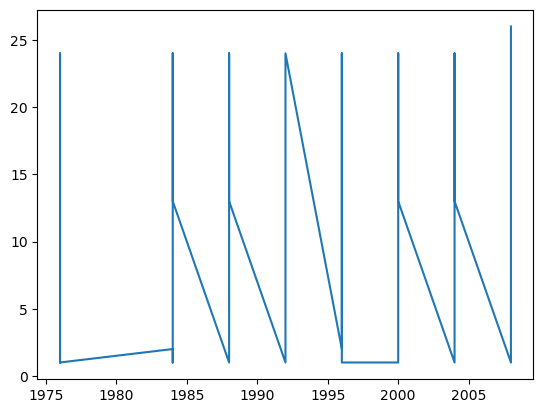

In [24]:
#abscisa = df_summary[df_summary["Country_Code"] == "USA"]["Year"].to_list()
#abscisa = df_summary[df_summary["Country_Code"] == "USA"]["Year"]
#print(abscisa)
#ordenada = df_summary[df_summary["Country_Code"] == "USA"]["Medal"].to_list()
#ordenada = df_summary[df_summary["Country_Code"] == "USA"]["Medal"]
#print(ordenada)

plt.plot(df_summary[df_summary["Country_Code"] == "USA"]["Year"], df_summary[df_summary["Country_Code"] == "USA"]["Medal"])
#df_summary.plot.barh(x="Year", y="Medal")
plt.show()

In [25]:
#df["Year"].dtype = "date"

In [26]:
#df_summary.to_csv("./summary.csv", encoding="ISO-8859-1", index=False)

In [27]:
#df.to_csv("./medals.csv", encoding="ISO-8859-1", index=False)

### CRUD

### ML Model

In [28]:
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

### Split the Data into Training and Testing Sets

In [29]:
# Separate the data into labels and features
#y = result_query7[["country", "medal"]]

# Separate the X variable, the features
#X = result_query7[["city", "year"]]

In [30]:
# PANDAS
# Separate the data into labels and features
X = df_summary[["Year", "Country_Code", "Event"]]

# Separate the X variable, the features
#y = df_summary[["Medal"]]
y = df_summary["Medal"].to_numpy()

In [31]:
print(y)
print(X)

[ 1  2 16 ...  1  1  1]
      Year Country_Code                         Event
0     1976          AUS               1500m freestyle
1     1976          AUS       470 - Two Person Dinghy
2     1976          AUS                        hockey
3     1976          AUS   single-handed dinghy (Finn)
4     1976          AUS                          team
...    ...          ...                           ...
5935  2008          VIE  - 56kg, total (bantamweight)
5936  2008          ZIM               100m backstroke
5937  2008          ZIM               200m backstroke
5938  2008          ZIM        200m individual medley
5939  2008          ZIM        400m individual medley

[5940 rows x 3 columns]


In [32]:
# #Encode categorical to numerical values 
# cc_encoded = pd.get_dummies(X["Country_Code"]).astype("int")
# cc_encoded

In [35]:
#Encode categorical to numerical values 
summary_encoded = pd.get_dummies(X).astype("int")
summary_encoded

,Year,Country_Code_AFG,Country_Code_AHO,Country_Code_ALG,Country_Code_ARG,Country_Code_ARM,Country_Code_AUS,Country_Code_AUT,Country_Code_AZE,Country_Code_BAH,...,Event_trap (125 targets),Event_trap (75 targets),Event_triple jump,Event_two-person keelboat open (Star),Event_uneven bars,Event_vault,Event_volleyball,Event_water polo,Event_épée individual,Event_épée team
0,1976,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1976,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1976,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1976,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1976,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5935,2008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5936,2008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5937,2008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5938,2008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#summary_encoded.to_csv("summary_encoded.csv")

In [37]:
#y.assign(uno = 1).pivot_table(index = "country", columns="medal", aggfunc={"uno" : "sum"}).reset_index()

In [38]:
# Split our preprocessed data into our features and target arrays
X = summary_encoded

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [40]:
X_train_scaled[0]

array([-9.97303550e-01, -1.49839010e-02, -1.49839010e-02, -4.24142145e-02,
       -6.54456871e-02, -4.49921271e-02, -2.03407163e-01, -6.71534278e-02,
       -5.40981482e-02, -3.35200762e-02, -1.49839010e-02,  0.00000000e+00,
       -7.51221729e-02,  0.00000000e+00, -9.63775238e-02, -1.06539841e-01,
       -1.57622081e-01, -1.51532546e-01, -2.59587066e-02, -2.20186275e-01,
       -1.49839010e-02, -2.11928152e-02, -3.96704047e-02, -2.11928152e-02,
       -5.81238194e-02, -1.67797533e-01, -7.51221729e-02, -8.09456089e-02,
       -1.49839010e-02, -2.59587066e-02, -2.11928152e-02, -2.99778994e-02,
       -1.49839010e-02, -1.32619530e-01, -3.67235302e-02, -4.97518595e-02,
       -1.18799672e-01, -8.37092186e-02, -1.95498157e-01, -1.33493164e-01,
       -1.89223747e-01, -2.00396525e-01, -5.61466218e-02, -2.04004795e-01,
       -1.49839010e-02, -9.39761764e-02, -1.49839010e-02, -2.11928152e-02,
       -1.62781129e-01, -5.81238194e-02, -3.67235302e-02, -2.11928152e-02,
       -6.71534278e-02, -

In [41]:
X_test_scaled[0]

array([ 1.39891433e+00, -1.49839010e-02, -1.49839010e-02, -4.24142145e-02,
       -6.54456871e-02, -4.49921271e-02, -2.03407163e-01, -6.71534278e-02,
       -5.40981482e-02, -3.35200762e-02, -1.49839010e-02,  0.00000000e+00,
       -7.51221729e-02,  0.00000000e+00, -9.63775238e-02, -1.06539841e-01,
       -1.57622081e-01, -1.51532546e-01, -2.59587066e-02, -2.20186275e-01,
       -1.49839010e-02, -2.11928152e-02, -3.96704047e-02, -2.11928152e-02,
       -5.81238194e-02, -1.67797533e-01, -7.51221729e-02, -8.09456089e-02,
       -1.49839010e-02, -2.59587066e-02, -2.11928152e-02, -2.99778994e-02,
       -1.49839010e-02, -1.32619530e-01, -3.67235302e-02, -4.97518595e-02,
       -1.18799672e-01, -8.37092186e-02, -1.95498157e-01, -1.33493164e-01,
       -1.89223747e-01, -2.00396525e-01, -5.61466218e-02, -2.04004795e-01,
       -1.49839010e-02, -9.39761764e-02, -1.49839010e-02, -2.11928152e-02,
       -1.62781129e-01, -5.81238194e-02, -3.67235302e-02, -2.11928152e-02,
       -6.71534278e-02, -

## Compile, Train and Evaluate the Model

### Linear regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [43]:
#pipeline = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', random_state=1, max_iter=1000))   # default max_iter=100
# Fit the pipeline to the training data
#pipeline.fit(X_train, y_train)

In [44]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
lrm = LogisticRegression(solver='lbfgs', random_state=42, max_iter=1000)   # default max_iter=100

# Fit the model using training data
lrm.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [45]:
# Make a prediction using the testing data
y_lrm_pred = lrm.predict(X_test_scaled)

In [46]:
balanced_accuracy_score(y_test, y_lrm_pred)

c:\Users\aleito\anaconda3\envs\data\Lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


0.46164172268077114

In [48]:
# Generate a confusion matrix for the model
cm = confusion_matrix(y_test, y_lrm_pred)
unique_classes = sorted(set(y_test) | set(y_lrm_pred))
index_labels = [f"Actual {cls}" for cls in unique_classes]
column_labels = [f"Predicted {cls}" for cls in unique_classes]
lrm_cm_df = pd.DataFrame(cm, index=index_labels, columns=column_labels)
print("Confusion Matrix:")
print(lrm_cm_df)
acc_score = balanced_accuracy_score(y_test, y_lrm_pred)
# # Display the accuracy score
print("Accuracy Score:", acc_score)

#lrm_cm_df.to_csv("lrm_cm_df.csv")

Confusion Matrix:
           Predicted 1  Predicted 2  Predicted 3  Predicted 4  Predicted 5  \
Actual 1           882           23            6            3            1   
Actual 2           104          116            1            5            0   
Actual 3            24            4           23            6            2   
Actual 4             6            9            2           74            5   
Actual 5             0            0            0           11           10   
Actual 6             0            0            0            6            0   
Actual 7             0            0            0            0            0   
Actual 8             0            0            0            6            0   
Actual 9             0            0            0            0            0   
Actual 10            0            0            0            3            0   
Actual 11            0            0            0            1            0   
Actual 12            0            0           

c:\Users\aleito\anaconda3\envs\data\Lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


## Compile, Train and Evaluate the Model

### Random Forest

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are prepared from historical data

# Instantiate the model
rf_model = RandomForestRegressor(random_state=42)   # default n_estimators=100 

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_rf_pred = rf_model.predict(X_test_scaled).astype("int")
#print(len(y_rf_pred))

# Evaluate the model
mse = mean_squared_error(y_test, y_rf_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.5239057239057239


In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np

In [51]:
#y_test_array = y_test["Medal"].to_list()
print(y_test)
print(y_rf_pred)

[13  1  1 ...  2  4  1]
[13  1  1 ...  1  4  1]


In [53]:
# y_pred = pipeline.predict(X_test)
# # Calculate the confusion matrix
cm = confusion_matrix(y_test, y_rf_pred)
unique_classes = sorted(set(y_test) | set(y_rf_pred))
index_labels = [f"Actual {cls}" for cls in unique_classes]
column_labels = [f"Predicted {cls}" for cls in unique_classes]
rf_cm_df = pd.DataFrame(cm, index=index_labels, columns=column_labels)
print("Confusion Matrix:")
print(rf_cm_df)
acc_score = accuracy_score(y_test, y_rf_pred)
# # Display the accuracy score
print("Accuracy Score:", acc_score)

#rf_cm_df.to_csv("rf_cm_df_1.csv")

Confusion Matrix:
           Predicted 1  Predicted 2  Predicted 3  Predicted 4  Predicted 5  \
Actual 1           903           11            1            0            0   
Actual 2           117          104            6            0            0   
Actual 3            19           15           22            2            4   
Actual 4             3           13           14           59            8   
Actual 5             0            0            0            7           13   
Actual 6             0            0            0            3            5   
Actual 7             0            0            0            0            0   
Actual 8             0            0            1            5            1   
Actual 9             0            0            0            0            1   
Actual 10            0            0            0            0            1   
Actual 11            0            0            0            0            0   
Actual 12            0            0           

In [54]:
#Old

# y_pred = pipeline.predict(X_test)
# # Calculate the confusion matrix
# cm = confusion_matrix(y_test_array, y_pred)
# # values in y_test
# unique_values = np.unique(np.concatenate((y_test_array, y_pred)))
# index_and_columns = [f"Actual {val}" for val in unique_values] + [f"Predicted {val}" for val in unique_values]
# cm_df = pd.DataFrame(cm, index=index_and_columns[:len(unique_values)], columns=index_and_columns[len(unique_values):])
# # Display the confusion matrix
# print("Confusion Matrix:")
# print(cm_df)
# # Calculate the accuracy score
# acc_score = accuracy_score(y_test_array, y_pred)
# # Display the accuracy score
# print("Accuracy Score:", acc_score)

In [55]:
# Most recent 

# y_pred = pipeline.predict(X_test)
# # Calculate the confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# unique_classes = sorted(set(y_test_array) | set(y_pred))
# index_labels = [f"Actual {cls}" for cls in unique_classes]
# column_labels = [f"Predicted {cls}" for cls in unique_classes]
# cm_df = pd.DataFrame(cm, index=index_labels, columns=column_labels)
# print("Confusion Matrix:")
# print(cm_df)
# acc_score = accuracy_score(y_test_array, y_pred)
# # Display the accuracy score
# print("Accuracy Score:", acc_score)

### Optimization

In [56]:
#Old

# n_est = list(range(200, 1000, 200))
# print(n_est)

# for n in n_est:
#     rf_model_o = RandomForestRegressor(random_state=42, n_estimators=n)   # default n_estimators=100 
    
#     # Train the model
#     rf_model_o.fit(X_train_scaled, y_train)
    
#     # Make predictions
#     y_rfo_pred = rf_model_o.predict(X_test_scaled).astype("int")
#     print(len(y_rfo_pred))
    
#     # Evaluate the model
#     mse_o = mean_squared_error(y_test, y_rfo_pred)
#     print("Mean Squared Error:", mse_o)

#     acc_score_o = accuracy_score(y_test, y_rfo_pred)
#     # # Display the accuracy score
#     print("Accuracy Score:", acc_score_o)

In [58]:
## Old - bootstrap=True

# n_est = list(range(20, 100, 20))
# print(n_est)

# for n in n_est:
#     print(n)
#     rf_model_o = RandomForestRegressor(random_state=42, n_estimators=n)   # default n_estimators=100 
    
#     # Train the model
#     rf_model_o.fit(X_train_scaled, y_train)
    
#     # Make predictions
#     y_rfo_pred = rf_model_o.predict(X_test_scaled).astype("int")
#     #print(len(y_rfo_pred))
    
#     # Evaluate the model
#     mse_o = mean_squared_error(y_test, y_rfo_pred)
#     print("Mean Squared Error:", mse_o)

#     acc_score_o = accuracy_score(y_test, y_rfo_pred)
#     # # Display the accuracy score
#     print("Accuracy Score:", acc_score_o, "\n")

In [59]:
n_est = list(range(20, 120, 20))
print(n_est, "\n")

for n in n_est:
    print(n, "bootstrap=False")
    rf_model_o = RandomForestRegressor(random_state=42, n_estimators=n, bootstrap=False)   # default n_estimators=100, bootstrap=True
    
    # Train the model
    rf_model_o.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_rfo_pred = rf_model_o.predict(X_test_scaled).astype("int")
    #print(len(y_rfo_pred))
    
    # Evaluate the model
    mse_o = mean_squared_error(y_test, y_rfo_pred)
    print("Mean Squared Error:", mse_o)

    acc_score_o = accuracy_score(y_test, y_rfo_pred)
    # # Display the accuracy score
    print("Accuracy Score:", acc_score_o, "\n")

[20, 40, 60, 80, 100] 

20 bootstrap=False
Mean Squared Error: 1.9562289562289563
Accuracy Score: 0.7952861952861953 

40 bootstrap=False
Mean Squared Error: 1.956902356902357
Accuracy Score: 0.7946127946127947 

60 bootstrap=False
Mean Squared Error: 1.967003367003367
Accuracy Score: 0.7946127946127947 

80 bootstrap=False
Mean Squared Error: 1.967003367003367
Accuracy Score: 0.7946127946127947 

100 bootstrap=False
Mean Squared Error: 1.967003367003367
Accuracy Score: 0.7946127946127947 



In [62]:
rf_model_o = RandomForestRegressor(random_state=42, n_estimators=20, bootstrap=False)   # default n_estimators=100, bootstrap=True
    
# Train the model
rf_model_o.fit(X_train_scaled, y_train)

# Make predictions
y_rfo_pred = rf_model_o.predict(X_test_scaled).astype("int")
#print(len(y_rfo_pred))

# Evaluate the model
mse_o = mean_squared_error(y_test, y_rfo_pred)
print("Mean Squared Error:", mse_o)

acc_score_o = accuracy_score(y_test, y_rfo_pred)
# # Display the accuracy score
print("Accuracy Score:", acc_score_o, "\n")

cm = confusion_matrix(y_test, y_rfo_pred)
unique_classes = sorted(set(y_test) | set(y_rfo_pred))
index_labels = [f"Actual {cls}" for cls in unique_classes]
column_labels = [f"Predicted {cls}" for cls in unique_classes]
rf_cm_df_final = pd.DataFrame(cm, index=index_labels, columns=column_labels)
print("Confusion Matrix:")
print(rf_cm_df_final)
acc_score = accuracy_score(y_test, y_rfo_pred)
# # Display the accuracy score
print("Accuracy Score:", acc_score)

#rf_cm_df_final.to_csv("rf_cm_df_final.csv")

Mean Squared Error: 1.9562289562289563
Accuracy Score: 0.7952861952861953 

Confusion Matrix:
           Predicted 1  Predicted 2  Predicted 3  Predicted 4  Predicted 5  \
Actual 1           857           48            9            1            0   
Actual 2            94          116           14            3            0   
Actual 3            12           11           28            6            2   
Actual 4             1           10            7           74            3   
Actual 5             0            0            0            6           14   
Actual 6             0            0            0            1            1   
Actual 7             0            0            0            0            0   
Actual 8             0            0            1            5            0   
Actual 9             0            0            0            1            0   
Actual 10            0            0            0            0            0   
Actual 11            0            0            0

In [63]:
criteria = ["squared_error", "friedman_mse", "poisson"]
print(criteria, "\n")

for c in criteria:
    print(c)
    rf_model_o = RandomForestRegressor(random_state=42, criterion=c)   # default n_estimators=100, bootstrap=True, criterion="squared_error"
    
    # Train the model
    rf_model_o.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_rfo_pred = rf_model_o.predict(X_test_scaled).astype("int")
    #print(len(y_rfo_pred))
    
    # Evaluate the model
    mse_o = mean_squared_error(y_test, y_rfo_pred)
    print("Mean Squared Error:", mse_o)

    acc_score_o = accuracy_score(y_test, y_rfo_pred)
    # # Display the accuracy score
    print("Accuracy Score:", acc_score_o, "\n")

['squared_error', 'friedman_mse', 'poisson'] 

squared_error
Mean Squared Error: 1.5239057239057239
Accuracy Score: 0.7771043771043771 

friedman_mse
Mean Squared Error: 1.5427609427609428
Accuracy Score: 0.7784511784511785 

poisson
Mean Squared Error: 1.5245791245791245
Accuracy Score: 0.767003367003367 



In [89]:
# np_lrm = lrm_cm_df.to_numpy()
# lrm_cm_df_p = np.diag(np_lrm)
# lrm_cm_df_p

In [90]:
#e_np_lrm = lrm_cm_df.to_numpy()
#e_lrm_cm_df_p = np.diag(e_np_lrm, k=-1)
#e_lrm_cm_df_p

In [91]:
# np_rf_1 = rf_cm_df.to_numpy()
# rf_cm_df_p = np.diag(np_rf_1)
# rf_cm_df_p

In [92]:
# np_rf_f = rf_cm_df_final.to_numpy()
#rf_f_cm_df_p = np.diag(np_rf_1)
#rf_f_cm_df_p

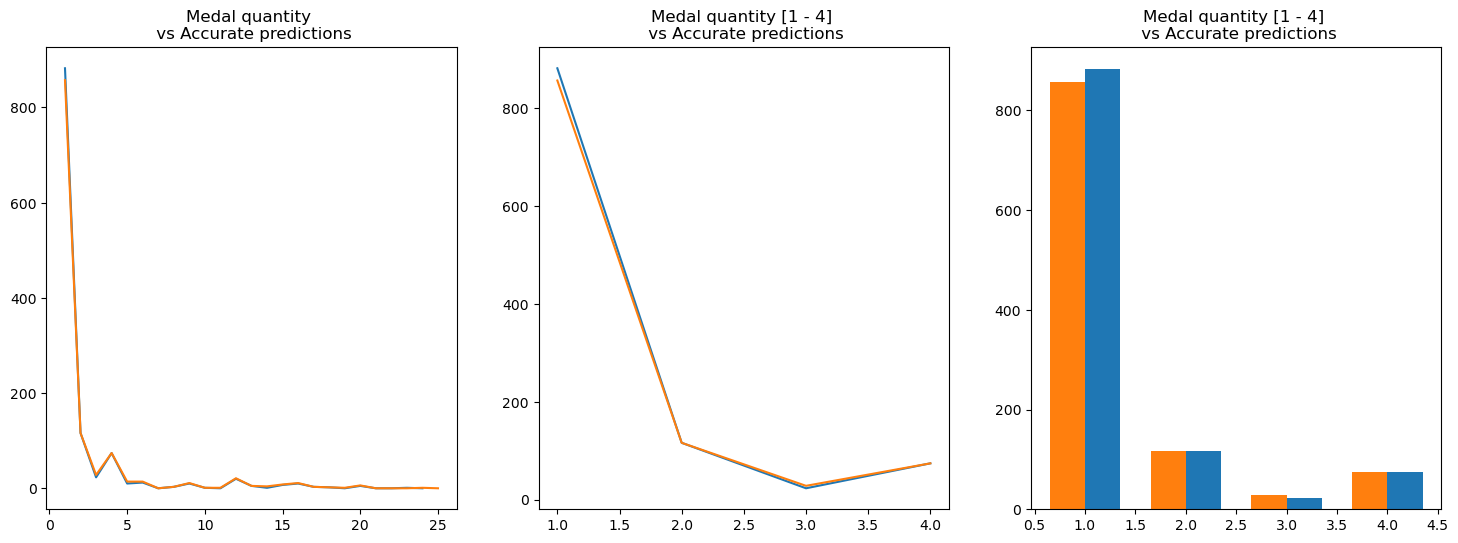

In [161]:
lr_diag = lrm_cm_df.values.diagonal()
rff_diag = rf_cm_df_final.values.diagonal()
#plt.plot(lr_diag)
#plt.plot(rff_diag)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
ax1.plot(np.arange(1, 25), lr_diag)
ax1.plot(np.arange(1, 26), rff_diag)
ax1.set_title('Medal quantity \n vs Accurate predictions')
#plt.xticks(ticks=range(25), labels=rf_cm_df_final.columns, rotation='vertical')
#plt.show()

ax2.plot(np.arange(1, 5), lr_diag[:4])
ax2.plot(np.arange(1, 5), rff_diag[:4])
ax2.set_title('Medal quantity [1 - 4] \n vs Accurate predictions')

bar_width = 0.35
ax3.bar(x=np.arange(1, 5) + bar_width / 2, height=lr_diag[:4], width=bar_width)
ax3.bar(x=np.arange(1, 5) - bar_width / 2, height=rff_diag[:4], width=bar_width)
ax3.set_title('Medal quantity [1 - 4] \n vs Accurate predictions')
plt.show()

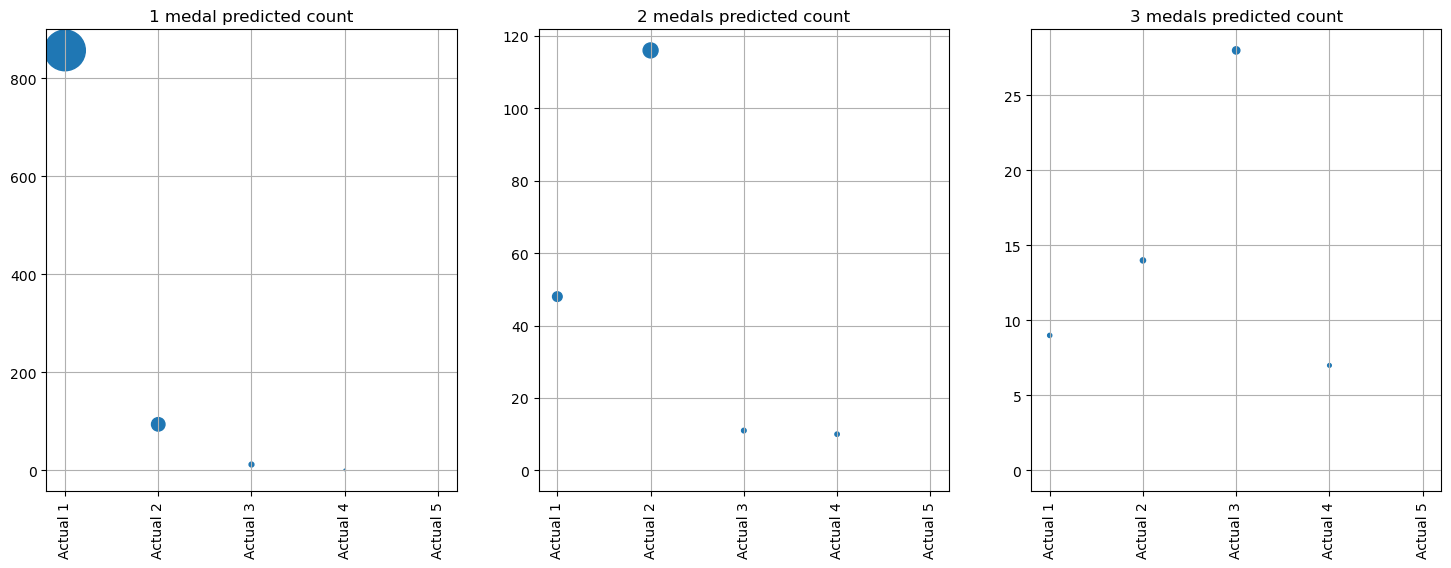

In [200]:
#plt.scatter(x=rf_cm_df_final.columns, y=rf_cm_df_final.index)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
ax1.scatter(rf_cm_df_final.index[:5], rf_cm_df_final["Predicted 1"][:5], s=rf_cm_df_final["Predicted 1"][:5])
ax1.set_xticks(ticks=rf_cm_df_final.index[:5], labels=rf_cm_df_final.index[:5], rotation='vertical')
ax1.set_title('1 medal predicted count')
ax1.grid(visible=True, which='major')
ax2.scatter(rf_cm_df_final.index[:5], rf_cm_df_final["Predicted 2"][:5], s=rf_cm_df_final["Predicted 2"][:5])
ax2.set_xticks(ticks=rf_cm_df_final.index[:5], labels=rf_cm_df_final.index[:5], rotation='vertical')
ax2.set_title('2 medals predicted count')
ax2.grid(visible=True, which='major')
ax3.scatter(rf_cm_df_final.index[:5], rf_cm_df_final["Predicted 3"][:5], s=rf_cm_df_final["Predicted 3"][:5])
ax3.set_xticks(ticks=rf_cm_df_final.index[:5], labels=rf_cm_df_final.index[:5], rotation='vertical')
ax3.set_title('3 medals predicted count')
ax3.grid(visible=True, which='major')
#plt.title('Medal quantity \n vs Accurate predictions')
#plt.xticks(rotation='vertical')
plt.show()

In [123]:
# plt.plot(lr_diag[:4])
# plt.plot(rff_diag[:4])

In [124]:
#plt.plot(np.diag(lrm_cm_df.to_numpy()))
#plt.plot(np.diag(rf_cm_df_final.to_numpy()))

In [125]:
#plt.plot(np.diag(lrm_cm_df.to_numpy())[:4])
#plt.plot(np.diag(rf_cm_df_final.to_numpy())[:4])

In [126]:
# bar_width = 0.35

# plt.bar(x=np.arange(1, 5) + bar_width / 2, height=lr_diag[:4], width=bar_width)
# plt.bar(x=np.arange(1, 5) - bar_width / 2, height=rff_diag[:4], width=bar_width)

# #plt.bar(x=np.arange(4) + bar_width/2, height=np.diag(lrm_cm_df.to_numpy())[:4], width=bar_width)
# #plt.bar(x=np.arange(4) - bar_width/2, height=np.diag(rf_cm_df_final.to_numpy())[:4], width=bar_width)


In [127]:
# diagonal = rf_cm_df_final.values.diagonal()

# plt.plot(diagonal)

([<matplotlib.axis.YTick at 0x19dff77f610>,
 [Text(0, 0, 'Actual 1'),
  Text(0, 1, 'Actual 2'),
  Text(0, 2, 'Actual 3'),
  Text(0, 3, 'Actual 4'),
  Text(0, 4, 'Actual 5'),
  Text(0, 5, 'Actual 6'),
  Text(0, 6, 'Actual 7'),
  Text(0, 7, 'Actual 8'),
  Text(0, 8, 'Actual 9'),
  Text(0, 9, 'Actual 10'),
  Text(0, 10, 'Actual 11'),
  Text(0, 11, 'Actual 12'),
  Text(0, 12, 'Actual 13'),
  Text(0, 13, 'Actual 14'),
  Text(0, 14, 'Actual 15'),
  Text(0, 15, 'Actual 16'),
  Text(0, 16, 'Actual 17'),
  Text(0, 17, 'Actual 18'),
  Text(0, 18, 'Actual 20'),
  Text(0, 19, 'Actual 24'),
  Text(0, 20, 'Actual 26'),
  Text(0, 21, 'Actual 28'),
  Text(0, 22, 'Actual 29'),
  Text(0, 23, 'Actual 32'),
  Text(0, 24, 'Actual 36')])

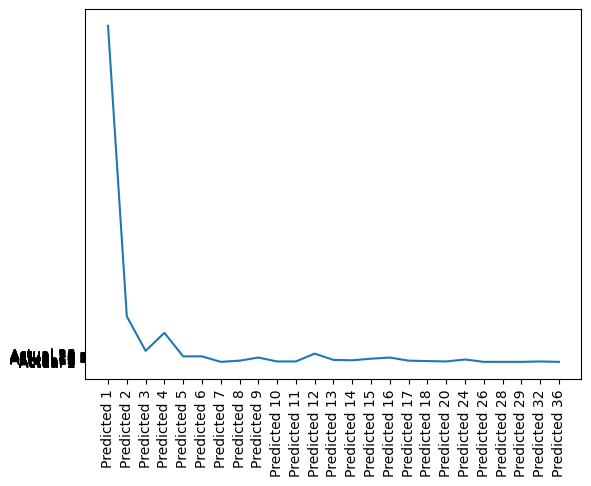

In [99]:
# Labels

xlabel = rf_cm_df_final.columns
xlabel

ylabel = rf_cm_df_final.index
ylabel

#plt.plot(np.diag(lrm_cm_df.to_numpy()))

plt.plot(np.diag(rf_cm_df_final.to_numpy()))
plt.xticks(ticks=range(25), labels=xlabel, rotation='vertical')
plt.yticks(ticks=range(25), labels=ylabel)

In [137]:
ylabel = rf_cm_df_final.index.values
ylabel

array(['Actual 1', 'Actual 2', 'Actual 3', 'Actual 4', 'Actual 5',
       'Actual 6', 'Actual 7', 'Actual 8', 'Actual 9', 'Actual 10',
       'Actual 11', 'Actual 12', 'Actual 13', 'Actual 14', 'Actual 15',
       'Actual 16', 'Actual 17', 'Actual 18', 'Actual 20', 'Actual 24',
       'Actual 26', 'Actual 28', 'Actual 29', 'Actual 32', 'Actual 36'],
      dtype=object)